### Data information is available in “Qualitative_Bankruptcy.info.txt” file

In [ ]:
#1.Reading the dataset and understanding the features and target variable.

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn import model_selection

In [8]:
col_names=["Industrial_Risk", "Management_Risk", "Financial_Flexibility", "Credibility", "Competitiveness", "Operating_Risk", "Class"]
bkd_df = pd.read_csv("Qualitative_Bankruptcy.data.txt",names=col_names) 
bkd_df.head()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [9]:
bkd_df.size,bkd_df.shape

(1750, (250, 7))

In [10]:
bkd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Industrial_Risk        250 non-null    object
 1   Management_Risk        250 non-null    object
 2   Financial_Flexibility  250 non-null    object
 3   Credibility            250 non-null    object
 4   Competitiveness        250 non-null    object
 5   Operating_Risk         250 non-null    object
 6   Class                  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [11]:
bkd_df.Industrial_Risk.value_counts()

N    89
A    81
P    80
Name: Industrial_Risk, dtype: int64

In [12]:
bkd_df.Management_Risk.value_counts()

N    119
A     69
P     62
Name: Management_Risk, dtype: int64

In [13]:
bkd_df.Financial_Flexibility.value_counts()

N    119
A     74
P     57
Name: Financial_Flexibility, dtype: int64

In [14]:
bkd_df.Credibility.value_counts()

N    94
P    79
A    77
Name: Credibility, dtype: int64

In [15]:
bkd_df.Competitiveness.value_counts()

N    103
P     91
A     56
Name: Competitiveness, dtype: int64

In [16]:
bkd_df.Operating_Risk.value_counts()

N    114
P     79
A     57
Name: Operating_Risk, dtype: int64

In [17]:
bkd_df.Class.value_counts()

NB    143
B     107
Name: Class, dtype: int64

#2.Encoding independent features

In [18]:
cat_col = []  # list to hold the categorical features
for i in bkd_df.columns:  # Loop to go through each and every column name
    if bkd_df[i].dtype == object:  # check if the column is of object type
        cat_col.append(i)  # append the ones that satisfy above condition to the list
    bkd_df.loc[0:3, cat_col]
for i in cat_col:
    print(f'Number of categories in {i} = {len(bkd_df[i].unique())}')

Number of categories in Industrial_Risk = 3
Number of categories in Management_Risk = 3
Number of categories in Financial_Flexibility = 3
Number of categories in Credibility = 3
Number of categories in Competitiveness = 3
Number of categories in Operating_Risk = 3
Number of categories in Class = 2


In [19]:
from sklearn.preprocessing import LabelEncoder
for i in cat_col:
    encoder = LabelEncoder()
    bkd_df[i] = encoder.fit_transform(bkd_df[i])

In [20]:
bkd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Industrial_Risk        250 non-null    int32
 1   Management_Risk        250 non-null    int32
 2   Financial_Flexibility  250 non-null    int32
 3   Credibility            250 non-null    int32
 4   Competitiveness        250 non-null    int32
 5   Operating_Risk         250 non-null    int32
 6   Class                  250 non-null    int32
dtypes: int32(7)
memory usage: 7.0 KB


In [21]:
bkd_df.head()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,Class
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1


In [22]:
bkd_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Industrial_Risk,250.0,0.996,0.804096,0.0,0.0,1.0,2.0,2.0
Management_Risk,250.0,0.972,0.724788,0.0,0.0,1.0,1.0,2.0
Financial_Flexibility,250.0,0.932,0.722123,0.0,0.0,1.0,1.0,2.0
Credibility,250.0,1.008,0.791481,0.0,0.0,1.0,2.0,2.0
Competitiveness,250.0,1.140,0.755435,0.0,1.0,1.0,2.0,2.0
Operating_Risk,250.0,1.088,0.733764,0.0,1.0,1.0,2.0,2.0
Class,250.0,0.572,0.495781,0.0,0.0,1.0,1.0,1.0


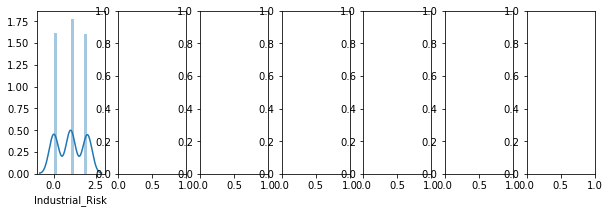

In [23]:
f, ax = plt.subplots(1, 7, figsize=(10,3))
vis1 = sns.distplot(bkd_df["Industrial_Risk"],bins=10, ax= ax[0])

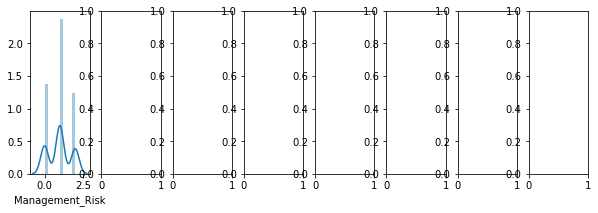

In [24]:
f, ax = plt.subplots(1, 8, figsize=(10,3))
vis2 = sns.distplot(bkd_df["Management_Risk"],bins=10, ax= ax[0])


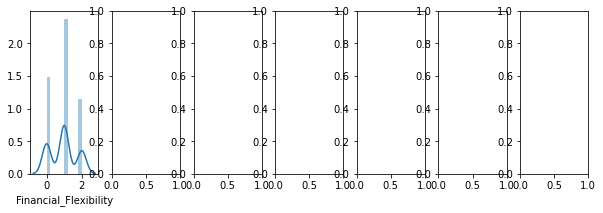

In [25]:
f, ax = plt.subplots(1, 7, figsize=(10,3))
vis3 = sns.distplot(bkd_df["Financial_Flexibility"],bins=10, ax= ax[0])

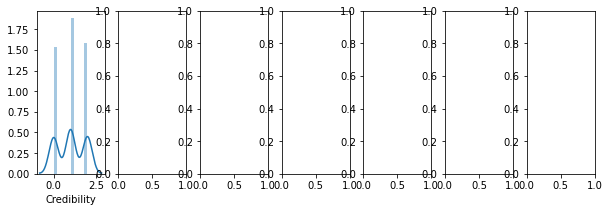

In [26]:
f, ax = plt.subplots(1, 7, figsize=(10,3))
vis4 = sns.distplot(bkd_df["Credibility"],bins=10, ax= ax[0])

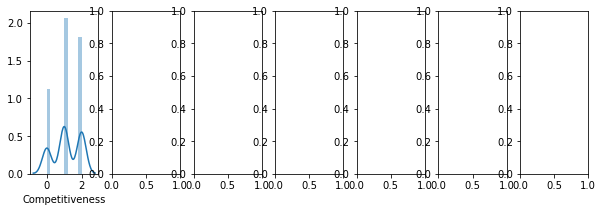

In [27]:
f, ax = plt.subplots(1, 7, figsize=(10,3))
vis5 = sns.distplot(bkd_df["Competitiveness"],bins=10, ax= ax[0])

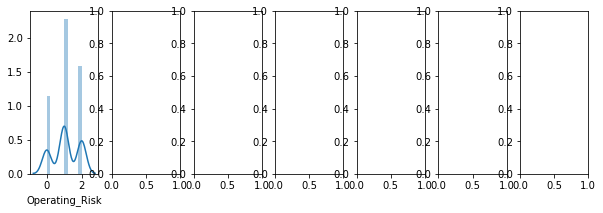

In [28]:
f, ax = plt.subplots(1, 7, figsize=(10,3))
vis6 = sns.distplot(bkd_df["Operating_Risk"],bins=10, ax= ax[0])

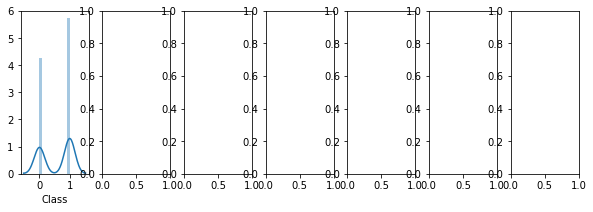

In [29]:
f, ax = plt.subplots(1, 7, figsize=(10,3))
vis7 = sns.distplot(bkd_df["Class"],bins=10, ax= ax[0])

#3. Separating the dependant variable from the rest of the train data

In [30]:
X = bkd_df.drop(columns= ["Class"])
y = bkd_df["Class"]

In [31]:
X.shape,X.size,y.shape,y.size

((250, 6), 1500, (250,), 250)

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Industrial_Risk        250 non-null    int32
 1   Management_Risk        250 non-null    int32
 2   Financial_Flexibility  250 non-null    int32
 3   Credibility            250 non-null    int32
 4   Competitiveness        250 non-null    int32
 5   Operating_Risk         250 non-null    int32
dtypes: int32(6)
memory usage: 6.0 KB


In [33]:
y.dtypes

dtype('int32')

#4.Splitting the dataset into training and test data

In [34]:
from sklearn import model_selection
test_size = 0.20 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((200, 6), (50, 6), (200,), (50,))

#5.Applying PCA on the independent features of train data.

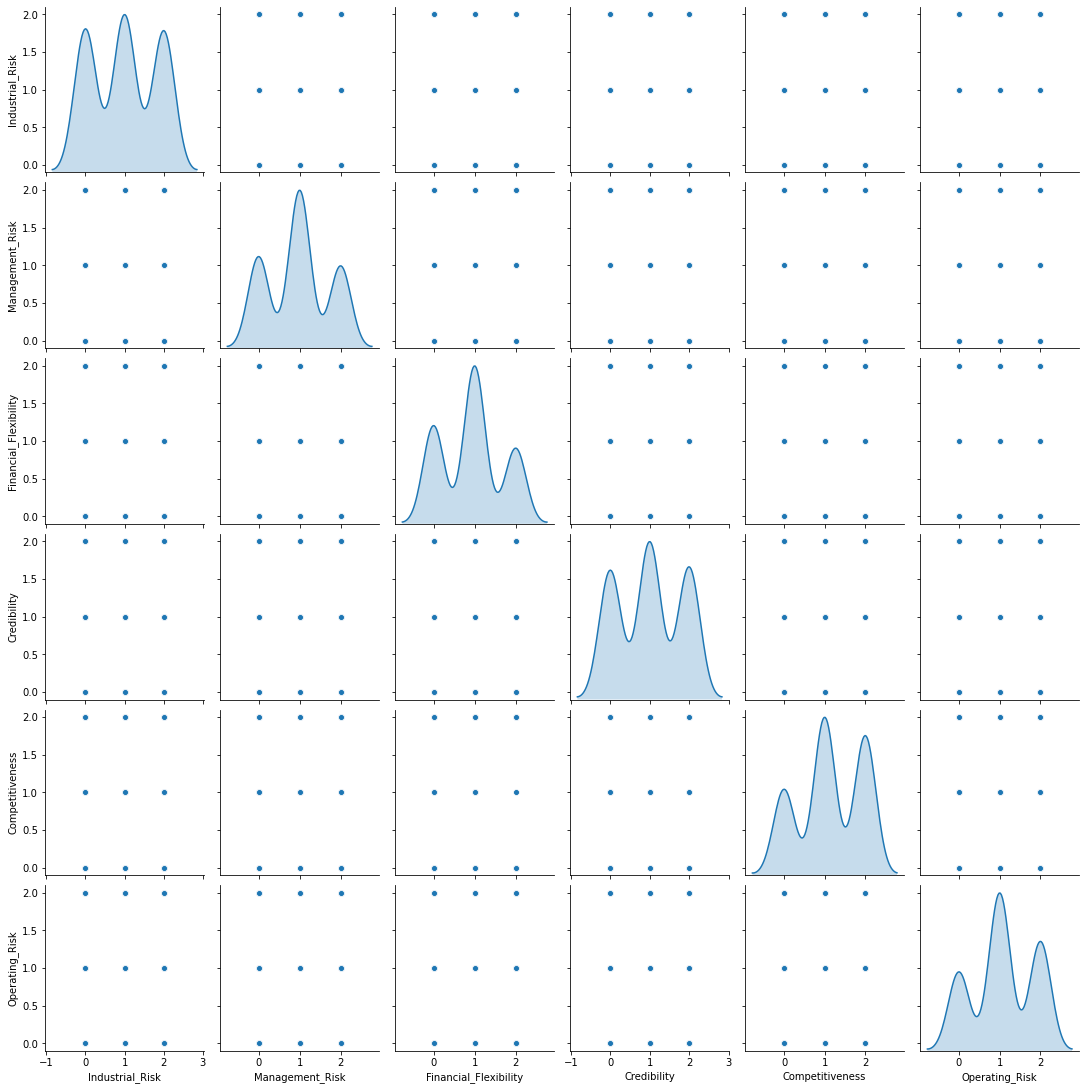

In [36]:
#Visually see the independent variable data
sns.pairplot(X, diag_kind='kde')

In [37]:
# Transform (centralize) the entire X (independent variable data) to zscores through transformation to create the PCA dimensions
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [38]:
X_train_sd

array([[ 0.05747661, -0.01414355,  0.05723638, -1.32110018, -0.16864581,
        -1.49455363],
       [ 0.05747661, -0.01414355, -1.37367314, -1.32110018, -1.51781233,
        -0.12340351],
       [ 1.33473457, -1.42849855,  1.4881459 ,  1.23175041,  1.1805207 ,
        -0.12340351],
       ...,
       [ 1.33473457, -0.01414355, -1.37367314, -1.32110018, -1.51781233,
         1.24774661],
       [-1.21978135,  1.40021145,  0.05723638, -1.32110018, -0.16864581,
        -0.12340351],
       [ 0.05747661, -1.42849855,  0.05723638, -0.04467489, -0.16864581,
        -0.12340351]])

In [43]:
X_test_sd

array([[-0.18670401,  0.23481812,  0.22721188, -1.11631261, -0.25      ,
        -1.45152899],
       [-1.35360408, -1.069727  ,  0.22721188,  0.12403473, -0.25      ,
        -0.10752067],
       [ 0.98019606, -1.069727  ,  1.48950011,  0.12403473,  1.        ,
        -0.10752067],
       [-1.35360408,  1.53936325, -1.03507635, -1.11631261, -1.5       ,
         1.23648766],
       [ 0.98019606,  1.53936325,  1.48950011,  1.36438208,  1.        ,
         1.23648766],
       [-0.18670401,  0.23481812,  1.48950011, -1.11631261, -1.5       ,
        -0.10752067],
       [ 0.98019606, -1.069727  , -1.03507635,  1.36438208,  1.        ,
        -0.10752067],
       [ 0.98019606,  0.23481812,  0.22721188,  0.12403473, -0.25      ,
        -0.10752067],
       [ 0.98019606,  0.23481812,  1.48950011,  1.36438208,  1.        ,
        -0.10752067],
       [-0.18670401,  0.23481812, -1.03507635,  1.36438208, -1.5       ,
        -0.10752067],
       [ 0.98019606,  0.23481812,  0.22721188,  0.

In [44]:
cov_matrix = np.cov(X_train_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00502513  0.10975145  0.05179846 -0.11211552  0.0357203   0.20074088]
 [ 0.10975145  1.00502513 -0.02969617 -0.0641387  -0.10787565  0.21264007]
 [ 0.05179846 -0.02969617  1.00502513 -0.03414267  0.09701182 -0.04219761]
 [-0.11211552 -0.0641387  -0.03414267  1.00502513  0.00973555  0.02084374]
 [ 0.0357203  -0.10787565  0.09701182  0.00973555  1.00502513 -0.0302121 ]
 [ 0.20074088  0.21264007 -0.04219761  0.02084374 -0.0302121   1.00502513]]


In [45]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('Eigenvalues \n%s' %e_vals)

Eigenvectors 
[[-0.50561377 -0.39482081  0.47228565  0.55433463 -0.23173273  0.06656252]
 [-0.56321137  0.16901624  0.42089763 -0.61934798  0.29952015 -0.06137919]
 [ 0.06725356 -0.61138533 -0.12864009  0.05942193  0.77562823  0.00255946]
 [ 0.20908621  0.32030756  0.31785715  0.1647211   0.27178557  0.80724991]
 [ 0.18042285 -0.58076046  0.06052332 -0.52730654 -0.42434436  0.41034313]
 [-0.58851948  0.04334021 -0.69177086  0.02012457 -0.03244912  0.41444128]]
Eigenvalues 
[1.38766227 1.15971624 0.72381663 0.82794817 0.91480842 1.01619902]


#6. Displaying elbow plot to find out reduced number of dimensions (which covers at least 95% of the variance)

In [46]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

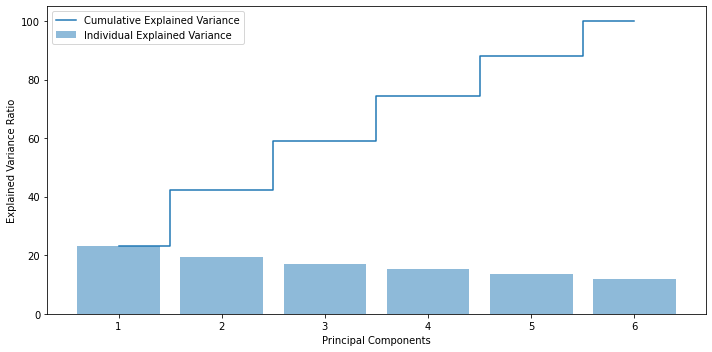

In [47]:
# Ploting Elbow diagram
plt.figure(figsize=(10 , 5))
plt.bar(range(1,e_vals.size+1), var_exp, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(1,e_vals.size+1),cum_var_exp, where= 'mid', label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#For covering 95% of the data we need all the dimensions. no dimension can be removed from the model.

#7.Transforming the data using PCA ( select optimum number of PCs).

In [48]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
w = np.hstack((eigen_pairs[0][1].reshape(6,1),eigen_pairs[1][1].reshape(6,1)))
print('Matrix W:\n', w)
X_sd_pca = X_train_sd.dot(w)
print(X_train_sd.shape, w.shape, X_sd_pca.shape)
eigen_pairs[:7]

Matrix W:
 [[-0.50561377 -0.39482081]
 [-0.56321137  0.16901624]
 [ 0.06725356 -0.61138533]
 [ 0.20908621  0.32030756]
 [ 0.18042285 -0.58076046]
 [-0.58851948  0.04334021]]
(200, 6) (6, 2) (200, 2)


[(1.3876622708883897,
  array([-0.50561377, -0.56321137,  0.06725356,  0.20908621,  0.18042285,
         -0.58851948])),
 (1.1597162431288888,
  array([-0.39482081,  0.16901624, -0.61138533,  0.32030756, -0.58076046,
          0.04334021])),
 (1.0161990205318903,
  array([ 0.06656252, -0.06137919,  0.00255946,  0.80724991,  0.41034313,
          0.41444128])),
 (0.9148084187169612,
  array([-0.23173273,  0.29952015,  0.77562823,  0.27178557, -0.42434436,
         -0.03244912])),
 (0.827948167867645,
  array([ 0.55433463, -0.61934798,  0.05942193,  0.1647211 , -0.52730654,
          0.02012457])),
 (0.7238166326350696,
  array([ 0.47228565,  0.42089763, -0.12864009,  0.31785715,  0.06052332,
         -0.69177086]))]

#8.Applying KMeans algorithm on the above transformed data.

In [49]:
#Applying K-Means Clustering
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [50]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(X_train_sd)
prediction=final_model.predict(X_train_sd)

In [51]:
#Append the prediction 
Predicted_df=X_train
Predicted_df["Cluster_Group"] = prediction
print("Groups Assigned : \n")
Predicted_df.head()

Groups Assigned : 



<ipython-input-51-56f5784fe903>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Predicted_df["Cluster_Group"] = prediction


,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,Cluster_Group
240,1,1,1,0,1,0,2
109,1,1,0,0,0,1,2
46,2,0,2,2,2,1,0
120,1,1,0,2,2,1,3
247,0,1,1,1,1,1,4


#9.Selecting optimal number of clusters and form clusters out of the train data

In [52]:
clusters=range(1,7)
meanDistortions=[]
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_train_sd)
    prediction=model.predict(X_train_sd)
    meanDistortions.append(sum(np.min(cdist(X_train_sd, model.cluster_centers_, 'euclidean'), axis=1)) / X_train_sd.shape[0])

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

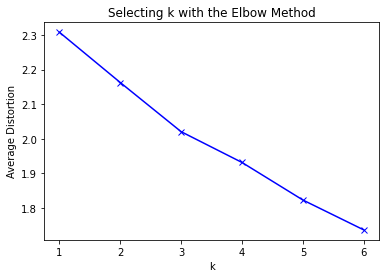

In [53]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method')

#Though the bend is not coming out clearly as there are 2 bends, let us look at 5 clusters

#10.Creating a new column in the train data and populate it with the cluster labels.

In [54]:
#Append the prediction to train data
Predicted_df=X_train
Predicted_df["Cluster_Group"] = prediction
print("Groups Assigned : \n")
Predicted_df.head()

Groups Assigned : 



<ipython-input-54-767d2d0aa548>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Predicted_df["Cluster_Group"] = prediction


,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,Cluster_Group
240,1,1,1,0,1,0,1
109,1,1,0,0,0,1,1
46,2,0,2,2,2,1,4
120,1,1,0,2,2,1,3
247,0,1,1,1,1,1,1


In [55]:
Predicted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 240 to 175
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Industrial_Risk        200 non-null    int32
 1   Management_Risk        200 non-null    int32
 2   Financial_Flexibility  200 non-null    int32
 3   Credibility            200 non-null    int32
 4   Competitiveness        200 non-null    int32
 5   Operating_Risk         200 non-null    int32
 6   Cluster_Group          200 non-null    int32
dtypes: int32(7)
memory usage: 7.0 KB


#11.Transforming the test data using the same PCA object that was fit on the train data. 

In [56]:
cov_matrix_test = np.cov(X_test_sd.T)
print('Covariance Matrix \n%s', cov_matrix_test)

Covariance Matrix 
%s [[ 1.02040816  0.16900346  0.16352909  0.20085832  0.13097858  0.10754218]
 [ 0.16900346  1.02040816 -0.02083595  0.16841335 -0.20633112  0.4193654 ]
 [ 0.16352909 -0.02083595  1.02040816  0.00319526  0.34777329 -0.14818634]
 [ 0.20085832  0.16841335  0.00319526  1.02040816  0.41133968  0.1837143 ]
 [ 0.13097858 -0.20633112  0.34777329  0.41133968  1.02040816 -0.2331443 ]
 [ 0.10754218  0.4193654  -0.14818634  0.1837143  -0.2331443   1.02040816]]


In [57]:
e_vals_t, e_vecs_t = np.linalg.eig(cov_matrix_test)
print('Eigenvectors \n%s' %e_vecs_t)
print('Eigenvalues \n%s' %e_vals_t)

Eigenvectors 
[[ 0.47417921 -0.06469285  0.42400362 -0.76686354  0.03032126  0.04680572]
 [ 0.42096419  0.43834385  0.224038    0.31697549  0.23940034 -0.65012676]
 [ 0.19455954 -0.42673272  0.6242592   0.49887698 -0.33356849  0.17378162]
 [ 0.57380713 -0.1307723  -0.5629191   0.02548554 -0.56961869 -0.10794029]
 [ 0.30641966 -0.59320148 -0.2471006   0.13204881  0.6890121   0.03139622]
 [ 0.370057    0.50257268 -0.04890541  0.21090808  0.17690967  0.72959409]]
Eigenvalues 
[1.64916965 1.7255436  0.99506987 0.78536385 0.38619177 0.58111024]


In [58]:
tot_t = sum(e_vals_t)
var_exp_t = [( i /tot_t ) * 100 for i in sorted(e_vals_t, reverse=True)]
cum_var_exp_t = np.cumsum(var_exp_t)

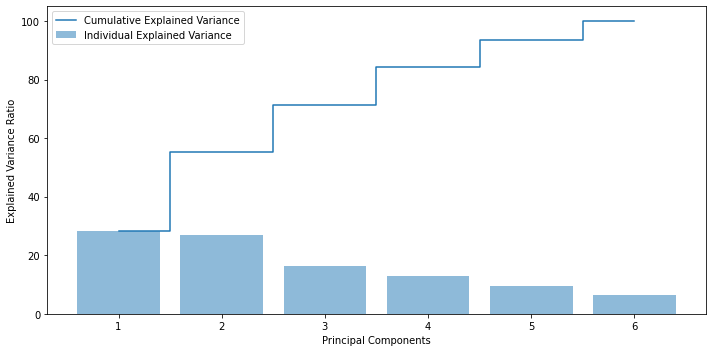

In [59]:
# Ploting Elbow diagram
plt.figure(figsize=(10 , 5))
plt.bar(range(1,e_vals_t.size+1), var_exp_t, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(1,e_vals_t.size+1),cum_var_exp_t, where= 'mid', label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [60]:
eigen_pairs_t = [(np.abs(e_vals_t[i]), e_vecs_t[:,i]) for i in range(len(e_vals_t))]
eigen_pairs_t.sort(reverse=True)
w_t = np.hstack((eigen_pairs_t[0][1].reshape(6,1),eigen_pairs[1][1].reshape(6,1)))
print('Matrix W_t:\n', w_t)
X_sd_pca_t = X_test_sd.dot(w_t)
print(X_test_sd.shape, w_t.shape, X_sd_pca_t.shape)
eigen_pairs[:7]

Matrix W_t:
 [[-0.06469285 -0.39482081]
 [ 0.43834385  0.16901624]
 [-0.42673272 -0.61138533]
 [-0.1307723   0.32030756]
 [-0.59320148 -0.58076046]
 [ 0.50257268  0.04334021]]
(50, 6) (6, 2) (50, 2)


[(1.3876622708883897,
  array([-0.50561377, -0.56321137,  0.06725356,  0.20908621,  0.18042285,
         -0.58851948])),
 (1.1597162431288888,
  array([-0.39482081,  0.16901624, -0.61138533,  0.32030756, -0.58076046,
          0.04334021])),
 (1.0161990205318903,
  array([ 0.06656252, -0.06137919,  0.00255946,  0.80724991,  0.41034313,
          0.41444128])),
 (0.9148084187169612,
  array([-0.23173273,  0.29952015,  0.77562823,  0.27178557, -0.42434436,
         -0.03244912])),
 (0.827948167867645,
  array([ 0.55433463, -0.61934798,  0.05942193,  0.1647211 , -0.52730654,
          0.02012457])),
 (0.7238166326350696,
  array([ 0.47228565,  0.42089763, -0.12864009,  0.31785715,  0.06052332,
         -0.69177086]))]

#12. Using the same kmeans object, assign cluster labels to the test data and store it as a feature.

In [61]:
clusters=range(1,7)
meanDistortions=[]
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_test_sd)
    prediction=model.predict(X_test_sd)
    meanDistortions.append(sum(np.min(cdist(X_test_sd, model.cluster_centers_, 'euclidean'), axis=1)) / X_test_sd.shape[0])

In [62]:
# Let us first start with K = 5
final_model_t=KMeans(5)
final_model_t.fit(X_test_sd)
prediction_t=final_model.predict(X_test_sd)

In [63]:
#Append the prediction to train data
Predicted_Test_df=X_test
Predicted_Test_df["Cluster_Group"] = prediction_t
print("Groups Assigned to test data : \n")
Predicted_Test_df.head()

Groups Assigned to test data : 



<ipython-input-63-33475090266b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Predicted_Test_df["Cluster_Group"] = prediction_t


,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,Cluster_Group
148,1,1,1,0,1,0,4
219,0,0,1,1,1,1,4
94,2,0,2,1,2,1,0
84,0,2,0,0,0,2,1
3,2,2,2,2,2,2,0


#13.Applying any classification ( i.e. SVC, Logistic) model on train dataset and predict target for test dataset.

#We will use support vector classifiers, Logistic regression and Naive Bayes

In [169]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
clf = SVC()
clf.fit(X_train_sd, y_train)
SVM_score = clf.score(X_test_sd , y_test)
print(f'Score : {round(SVM_score*100,3)}')
pred = clf.predict(X_test_sd)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()
SVM_recall = round((tp/(tp+fn)*100),3)
SVM_precision = round(tp/(tp+fp)*100, 3)
SVM_specificity =round(tn/(tn+fp)*100,3) 
SVM_f1score =  round(2*SVM_precision*SVM_recall/(SVM_precision + SVM_recall), 3)
print('Classification Report:\n ',classification_report(y_test,pred))

Score : 100.0
Classification Report:
               precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      1.00      1.00        34

avg / total       1.00      1.00      1.00        50



In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(X_train_sd, y_train)
lr_score = model.score(X_test_sd , y_test)
print(f'Score : {round(lr_score*100,3)}')
pred = model.predict(X_test_sd)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()
lr_recall = round((tp/(tp+fn)*100),3)
lr_precision = round(tp/(tp+fp)*100, 3)
lr_specificity =round(tn/(tn+fp)*100,3) 
lr_f1score =  round(2*lr_precision*lr_recall/(lr_precision + lr_recall), 3)
print('Classification Report:\n ',classification_report(y_test,pred))

Score : 48.0
Classification Report:
               precision    recall  f1-score   support

          0       0.27      0.38      0.32        16
          1       0.64      0.53      0.58        34

avg / total       0.52      0.48      0.50        50



In [168]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
NB = GaussianNB()
NB.fit(X_train_sd, y_train)
NB_score = model.score(X_test_sd , y_test)
print(f'Score : {round(lr_score*100,3)}')
pred = NB.predict(X_test_sd)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()
NB_recall = round((tp/(tp+fn)*100),3)
NB_precision = round(tp/(tp+fp)*100, 3)
NB_specificity =round(tn/(tn+fp)*100,3) 
NB_f1score =  round(2*NB_precision*NB_recall/(NB_precision + NB_recall), 3)
print('Classification Report:\n ',classification_report(y_test,pred))

Score : 48.0
Classification Report:
               precision    recall  f1-score   support

          0       1.00      0.88      0.93        16
          1       0.94      1.00      0.97        34

avg / total       0.96      0.96      0.96        50



#14.Checking accuracy and confusion matrix.

In [165]:
metric = np.array([[lr_score,lr_recall, lr_precision, lr_specificity,lr_f1score],[SVM_score,SVM_recall, SVM_precision, SVM_specificity,SVM_f1score],[NB_score,NB_recall, NB_precision, NB_specificity,NB_f1score]]).T

In [166]:
result = pd.DataFrame({'Model' : ['Logistic Regression', 'SVM','Naive Bayes'], 
'Accuracy' : metric[0],
'Recall' : metric[1],
'Precision' : metric[2],
'Specificity' : metric[3],
'f1Score' : metric[4]})
result

,Model,Accuracy,Recall,Precision,Specificity,f1Score
0,Logistic Regression,0.48,52.941,64.286,37.5,58.065
1,SVM,1.00,100.000,100.000,100.0,100.000
2,Naive Bayes,0.48,100.000,94.444,87.5,97.143


Conclusion:
SVM & Naive Bayes are overfitted.